# Семестровая по СППР

Город: Краснодар, Краснодарский край, Российская Федерация
Сумма образовательных учреждений: 364
   Из них
   - детских садов: 192
   - школ: 107
   - колледжей: 22
   - университетов: 43
Площадь всех образовательных учреждений: 12736417.430 кв.м.
Процент занимаемой образ. учреждениями площади города: 4.33 %

Город: Ростов-на-Дону, Ростовская область, Российская Федерация
Сумма образовательных учреждений: 406
   Из них
   - детских садов: 180
   - школ: 156
   - колледжей: 38
   - университетов: 32
Площадь всех образовательных учреждений: 10125170.411 кв.м.
Процент занимаемой образ. учреждениями площади города: 2.91 %

Город: Волгоград, Волгоградская область, Российская Федерация
Сумма образовательных учреждений: 485
   Из них
   - детских садов: 255
   - школ: 178
   - колледжей: 32
   - университетов: 20
Площадь всех образовательных учреждений: 10698294.718 кв.м.
Процент занимаемой образ. учреждениями площади города: 1.25 %



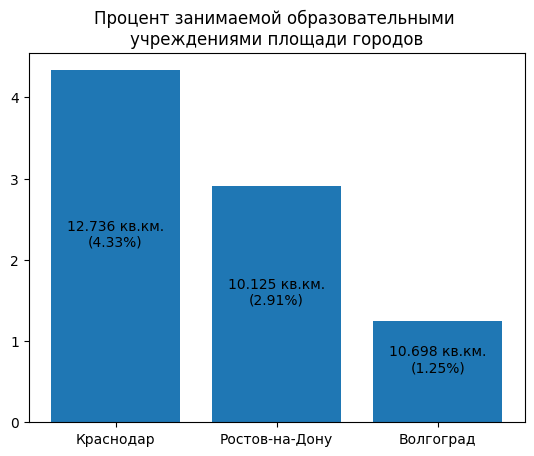

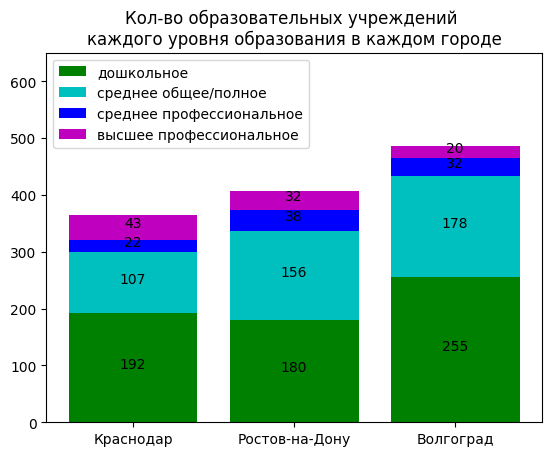

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx

cities=['Краснодар, Краснодарский край, Российская Федерация','Ростов-на-Дону, Ростовская область, Российская Федерация','Волгоград, Волгоградская область, Российская Федерация']#названия городов 
c_square=[294000000.0,348500000.0,859000000.0] #площади городов в кв.м.
edu_square=[0.,0.,0.]#общая площадь образовательных учреждений городов
final_mass=[]#массив с финальной обработанной информацией о городах
fin_names=[]#массив наименований образ.учреждений

def square(mass):    # расчет площади здания
    pos = 0.
    neg = 0.

    for i in range(len(mass)):
        if i != (len(mass) - 1):
            pos += mass[i][0] * mass[i + 1][1]
            if i >= 1:
                neg -= mass[i][0] * mass[i - 1][1]
        else:
            pos += mass[i][0] * mass[0][1]
            neg -= mass[i][0] * mass[i - 1][1]

    neg -= mass[0][0] * mass[len(mass) - 1][1]

    s = abs(pos + neg) * 10 ** 10

    return s


for c_num in range(len(cities)):
    fin_mass=[]#массив с готовой обработанной информацией о городе

    #вычленение из карты информации об образовательных учреждениях города по их типу (тегу)
    kindergartens = ox.geometries_from_place(cities[c_num], tags={'amenity': 'kindergarten'})
    schools = ox.geometries_from_place(cities[c_num], tags={'amenity': 'school'})
    colleges = ox.geometries_from_place(cities[c_num], tags={'amenity': 'college'})
    universities = ox.geometries_from_place(cities[c_num], tags={'amenity': 'university'})
    
    edu_mass=[]#массив образовательных учреждений каждого города
    edu_mass.append(kindergartens)
    edu_mass.append(schools)
    edu_mass.append(colleges)
    edu_mass.append(universities)

    final_edu_places = 0#все образовательные учреждения города (кол-во)
    count_amenities = [0,0,0,0] #количество учреждений каждого типа образования
    fin_edu_coords=[]#массив с финальными координатами каждого учреждения образ-я
    fin_names=[]#массив наименований учреждений образ-я
    for i in range(len(edu_mass)): #для каждого типа образовательных учреждений
        mass = [] #массив для промежуточной записи пар координат
        names = [] # массив наименований образовательных учреждений
        edu_coords=[]#массив координат образ.учреждений города
        edu_sqs = [] # массив суммарной площади образовательных учреждений каждого типа
       
        for item in edu_mass[i].name: # запись наименования образ. учреждения в массив
            names.append(item)
        
        fin_names.append(names)
        for item in edu_mass[i].geometry: # вычленение координат территории образ.учреждений
            try:
                main = str(item)
                main = main.replace("POLYGON ((", "")
                main = main.replace("))", "")
                main = main.replace(",", "")
                main = main.split(' ')
                main = list(map(float, main))
            except:
                continue

            count = 0
            edu_points=[]#промежуточный массив для записи точек образ. учреждений
            while count < len(main):
                mass.append(main[count])#широта
                mass.append(main[count + 1])#долгота
                edu_points.append(mass)#добавление вычлененной точки в массив точек
                mass = []#обнуление массива
                count += 2#переход к следующей паре координат

            sq = square(edu_points) # подсчет суммы площадей учреждений каждого типа
            
            edu_sqs.append(sq) # присоединение значения к массиву площадей
            edu_coords.append(edu_points[0])  # добавление точки от здания
            edu_points=[]#очистка массива для новых значений
        fin_edu_coords.append(edu_coords)#присоединение координат к массиву со всеми координатами учреждений
        for j in range(len(edu_sqs)):#подсчет сумм всех учреждений, всей площади, учреждений по типам
            final_edu_places+=1
            edu_square[c_num] += edu_sqs[j]
            count_amenities[i]+=1

    
    #внесение в итоговый массив всех значений
    fin_mass.append(cities[c_num]) # название города
    fin_mass.append(final_edu_places) # общее количество образовательных учреждений
    fin_mass.append(count_amenities)# кол-во учреждений по типам
    fin_mass.append(edu_square[c_num])# площадь всех образовательных учреждений
    fin_mass.append((edu_square[c_num]/c_square[c_num])*100)#процент площади образ.учреждений
    fin_mass.append(fin_names)#названия образовательных учреждений
    fin_mass.append(fin_edu_coords)#точки образовательных учреждений города
    
    #добавление инфо о городе в финальный массив
    final_mass.append(fin_mass) 
    
    # вывод результирующего массива (текстовый вывод)
    print("Город:",cities[c_num])
    print("Сумма образовательных учреждений:",str(final_edu_places))   
    print("   Из них\n   - детских садов:",str(count_amenities[0]))
    print("   - школ:",str(count_amenities[1]))
    print("   - колледжей:",str(count_amenities[2]))
    print("   - университетов:",str(count_amenities[3]))
    print("Площадь всех образовательных учреждений: {0:.3f} кв.м.".format(edu_square[c_num]))
    print("Процент занимаемой образ. учреждениями площади города: {0:.2f} %\n".format((edu_square[c_num]/c_square[c_num])*100))

#вывод графиков, статистики
#Процент площадей образ.учреждений в каждом городе
index = np.arange(3)
values = [final_mass[0][4], final_mass[1][4], final_mass[2][4]]#значения для вывода
plt.bar(index, values)#из чего строится столбчатая гистограмма
for i in range(len(final_mass)):
    plt.text(i, final_mass[i][4]/2, str("{0:.3f} кв.км.\n({1:.2f}%)".format(final_mass[i][3]/1000000.,final_mass[i][4])), ha = 'center')
    
plt.xticks(index, ['Краснодар', 'Ростов-на-Дону', 'Волгоград'])#подписи по иксу
plt.title("Процент занимаемой образовательными \nучреждениями площади городов") #название гистограммы
plt.show()#отображение гистограммы

#Кол-во образ.учреждений каждого уровня образ-я в каждом городе
index = np.arange(3)
values1 = np.array([final_mass[0][2][0], final_mass[1][2][0], final_mass[2][2][0]])#дет.сады
values2 = np.array([final_mass[0][2][1], final_mass[1][2][1], final_mass[2][2][1]])#школы
values3 = np.array([final_mass[0][2][2], final_mass[1][2][2], final_mass[2][2][2]])#колледжи
values4 = np.array([final_mass[0][2][3], final_mass[1][2][3], final_mass[2][2][3]])#вузы
plt.bar(index,values1,color='g',label='дошкольное')
plt.bar(index,values2,color='c',bottom=values1,label='среднее общее/полное')
plt.bar(index,values3,color='b',bottom=(values2+values1),label='среднее профессиональное')
plt.bar(index,values4,color='m',bottom=(values3+values2+values1),label='высшее профессиональное')
summ=[0,0,0]
for i in range(len(final_mass)):
    for j in range(len(final_mass[i][2])):
        summ[i]+=final_mass[i][2][j]
        plt.text(i, summ[i]-final_mass[i][2][j]+final_mass[i][2][j]/2, final_mass[i][2][j], ha = 'center')
plt.xticks(index, ['Краснодар', 'Ростов-на-Дону', 'Волгоград'])#подписи по иксу
plt.title("Кол-во образовательных учреждений \nкаждого уровня образования в каждом городе") #название гистограммы
plt.ylim(0,650)
plt.legend(loc=2)
plt.show()#отображение гистограммы




Город: Краснодар, Краснодарский край, Российская Федерация


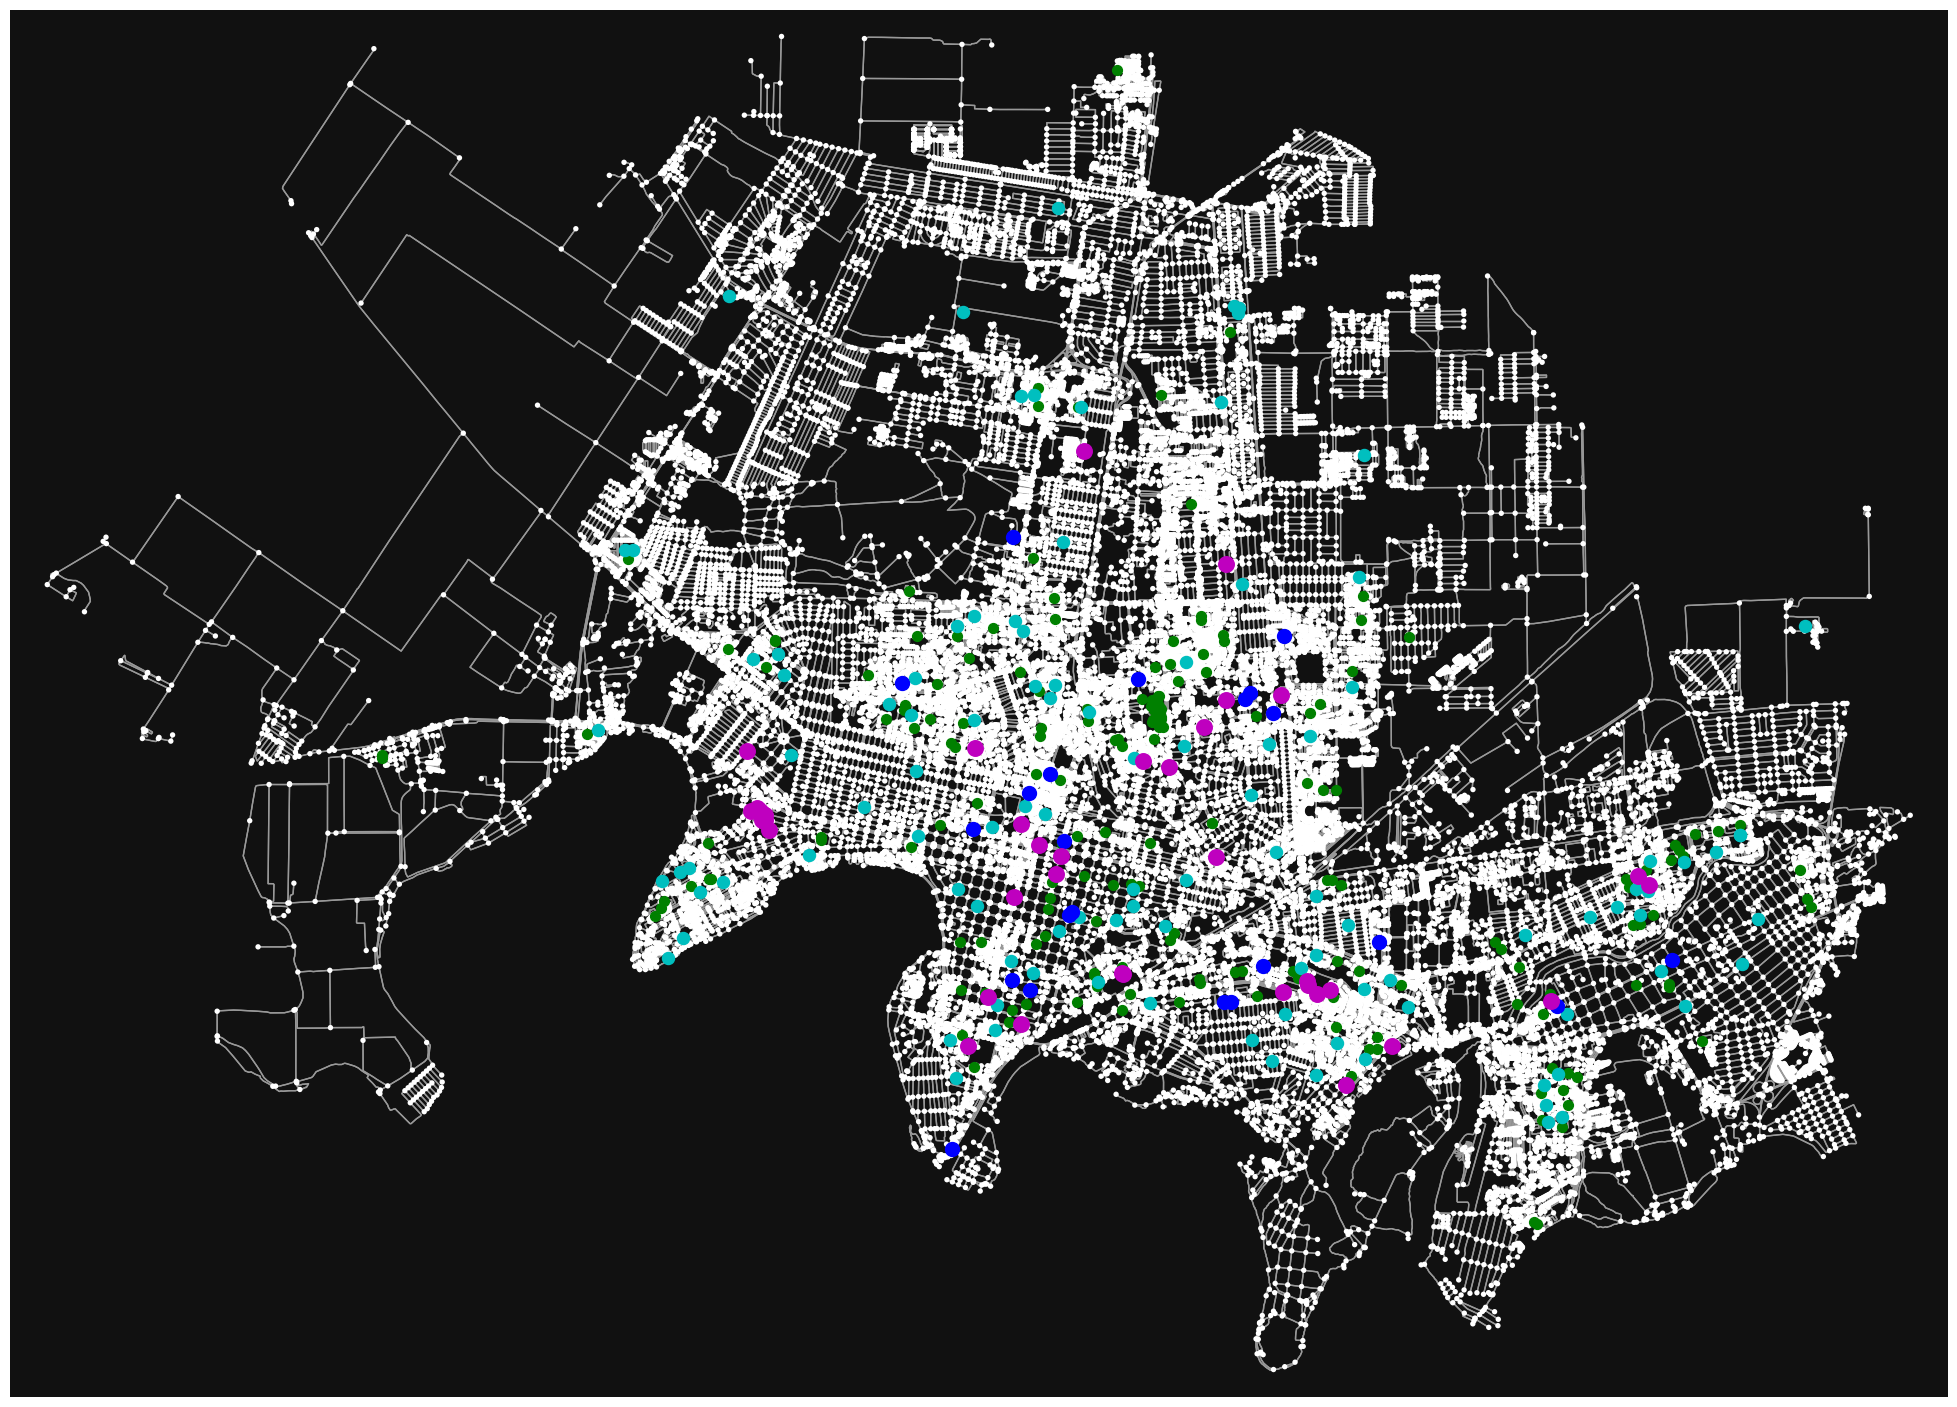


Город: Ростов-на-Дону, Ростовская область, Российская Федерация


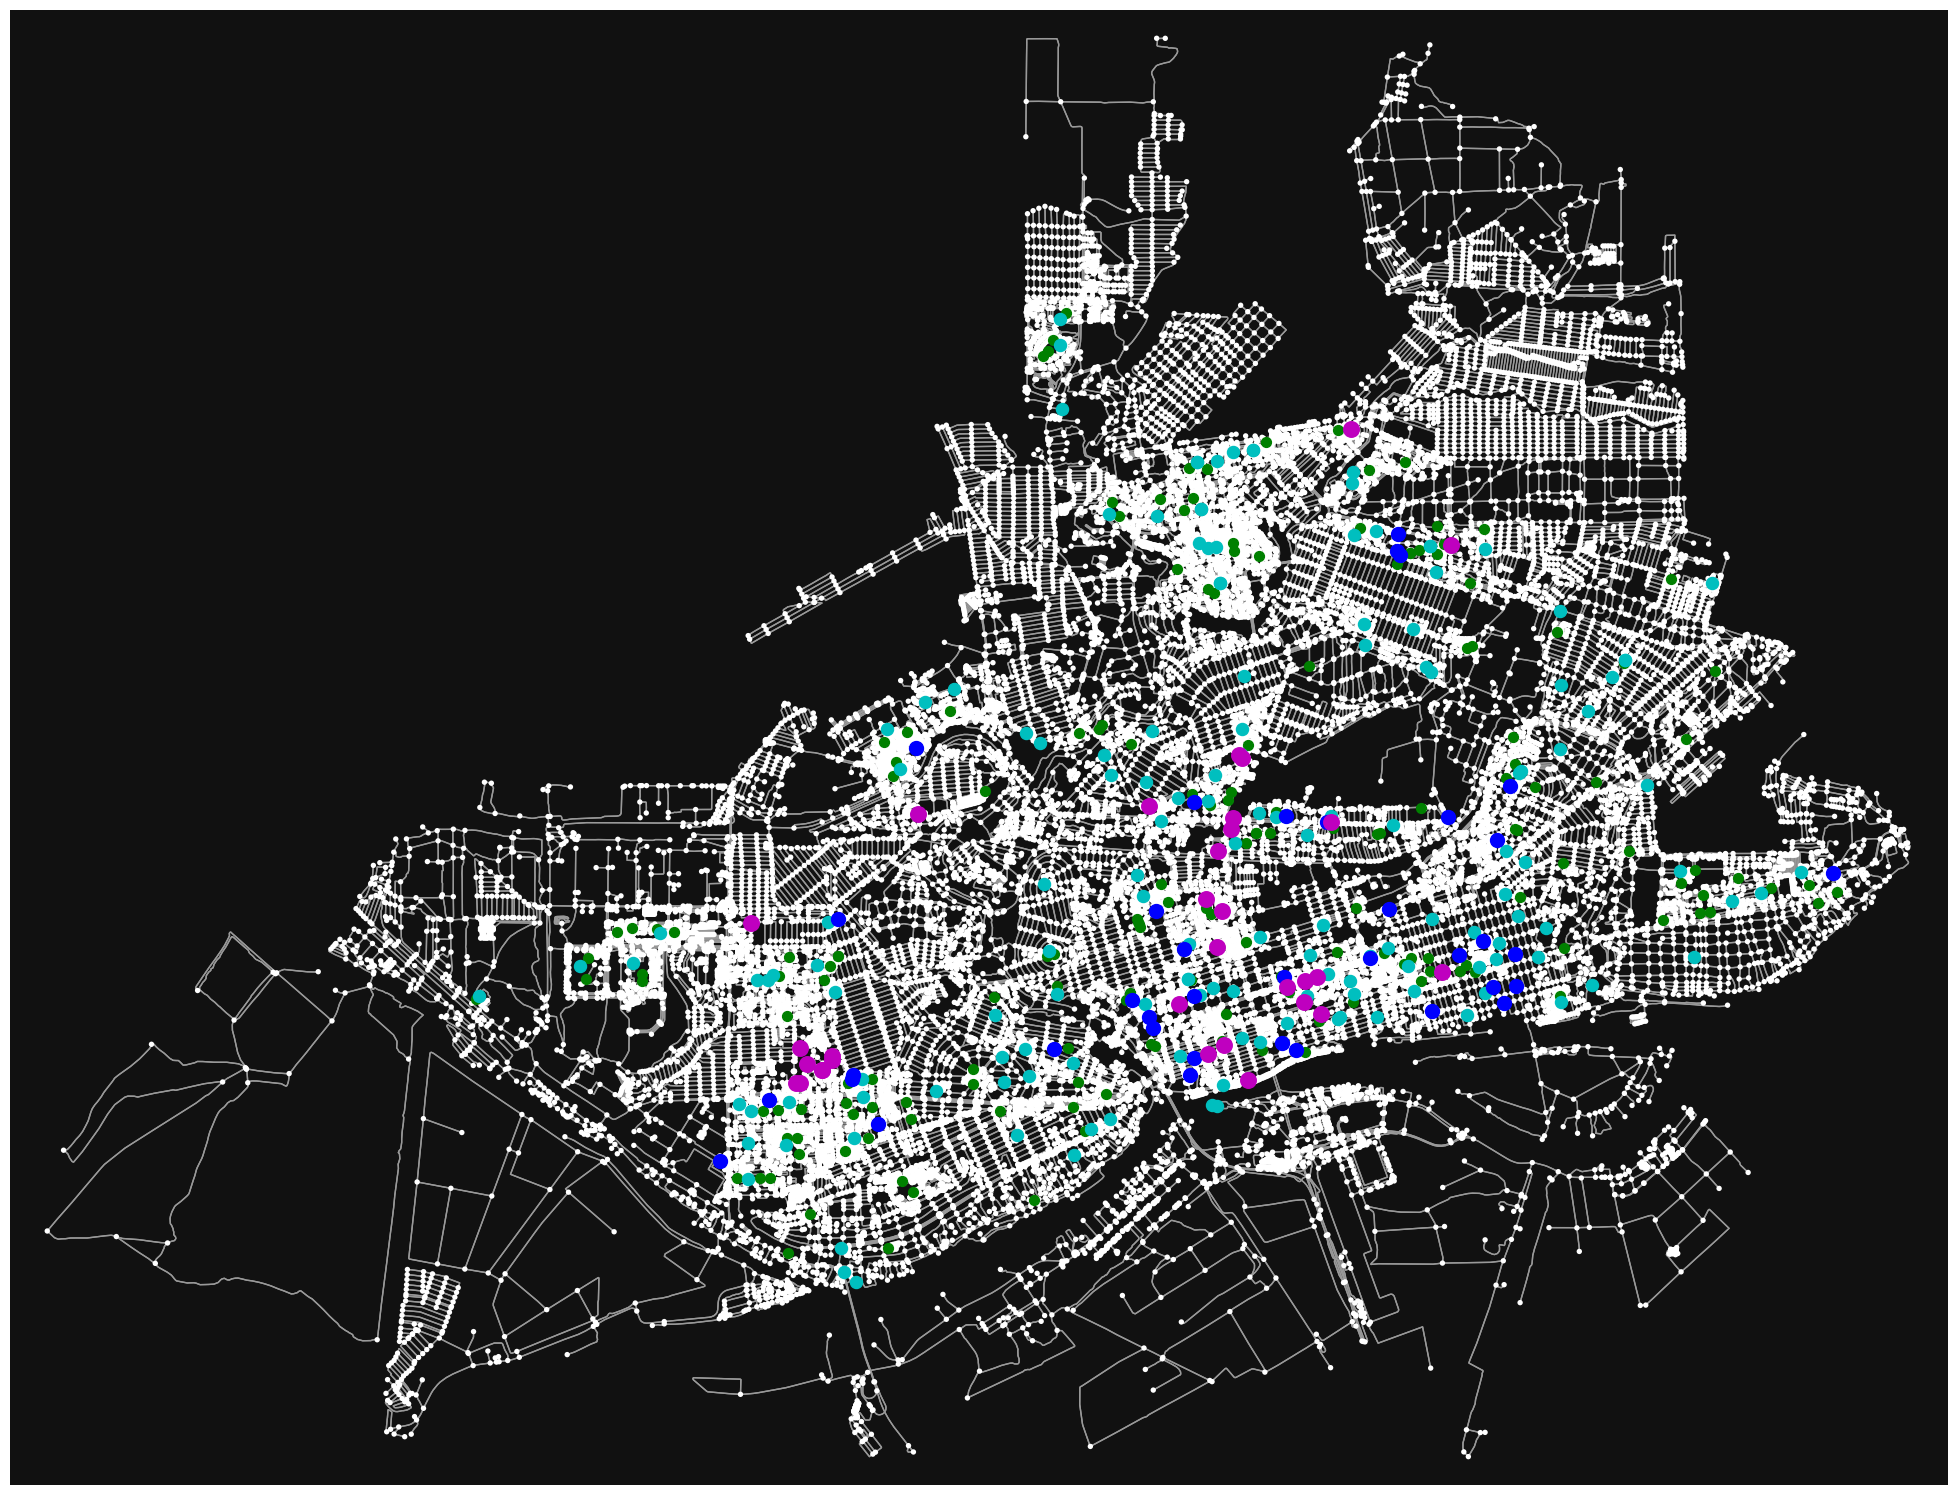


Город: Волгоград, Волгоградская область, Российская Федерация


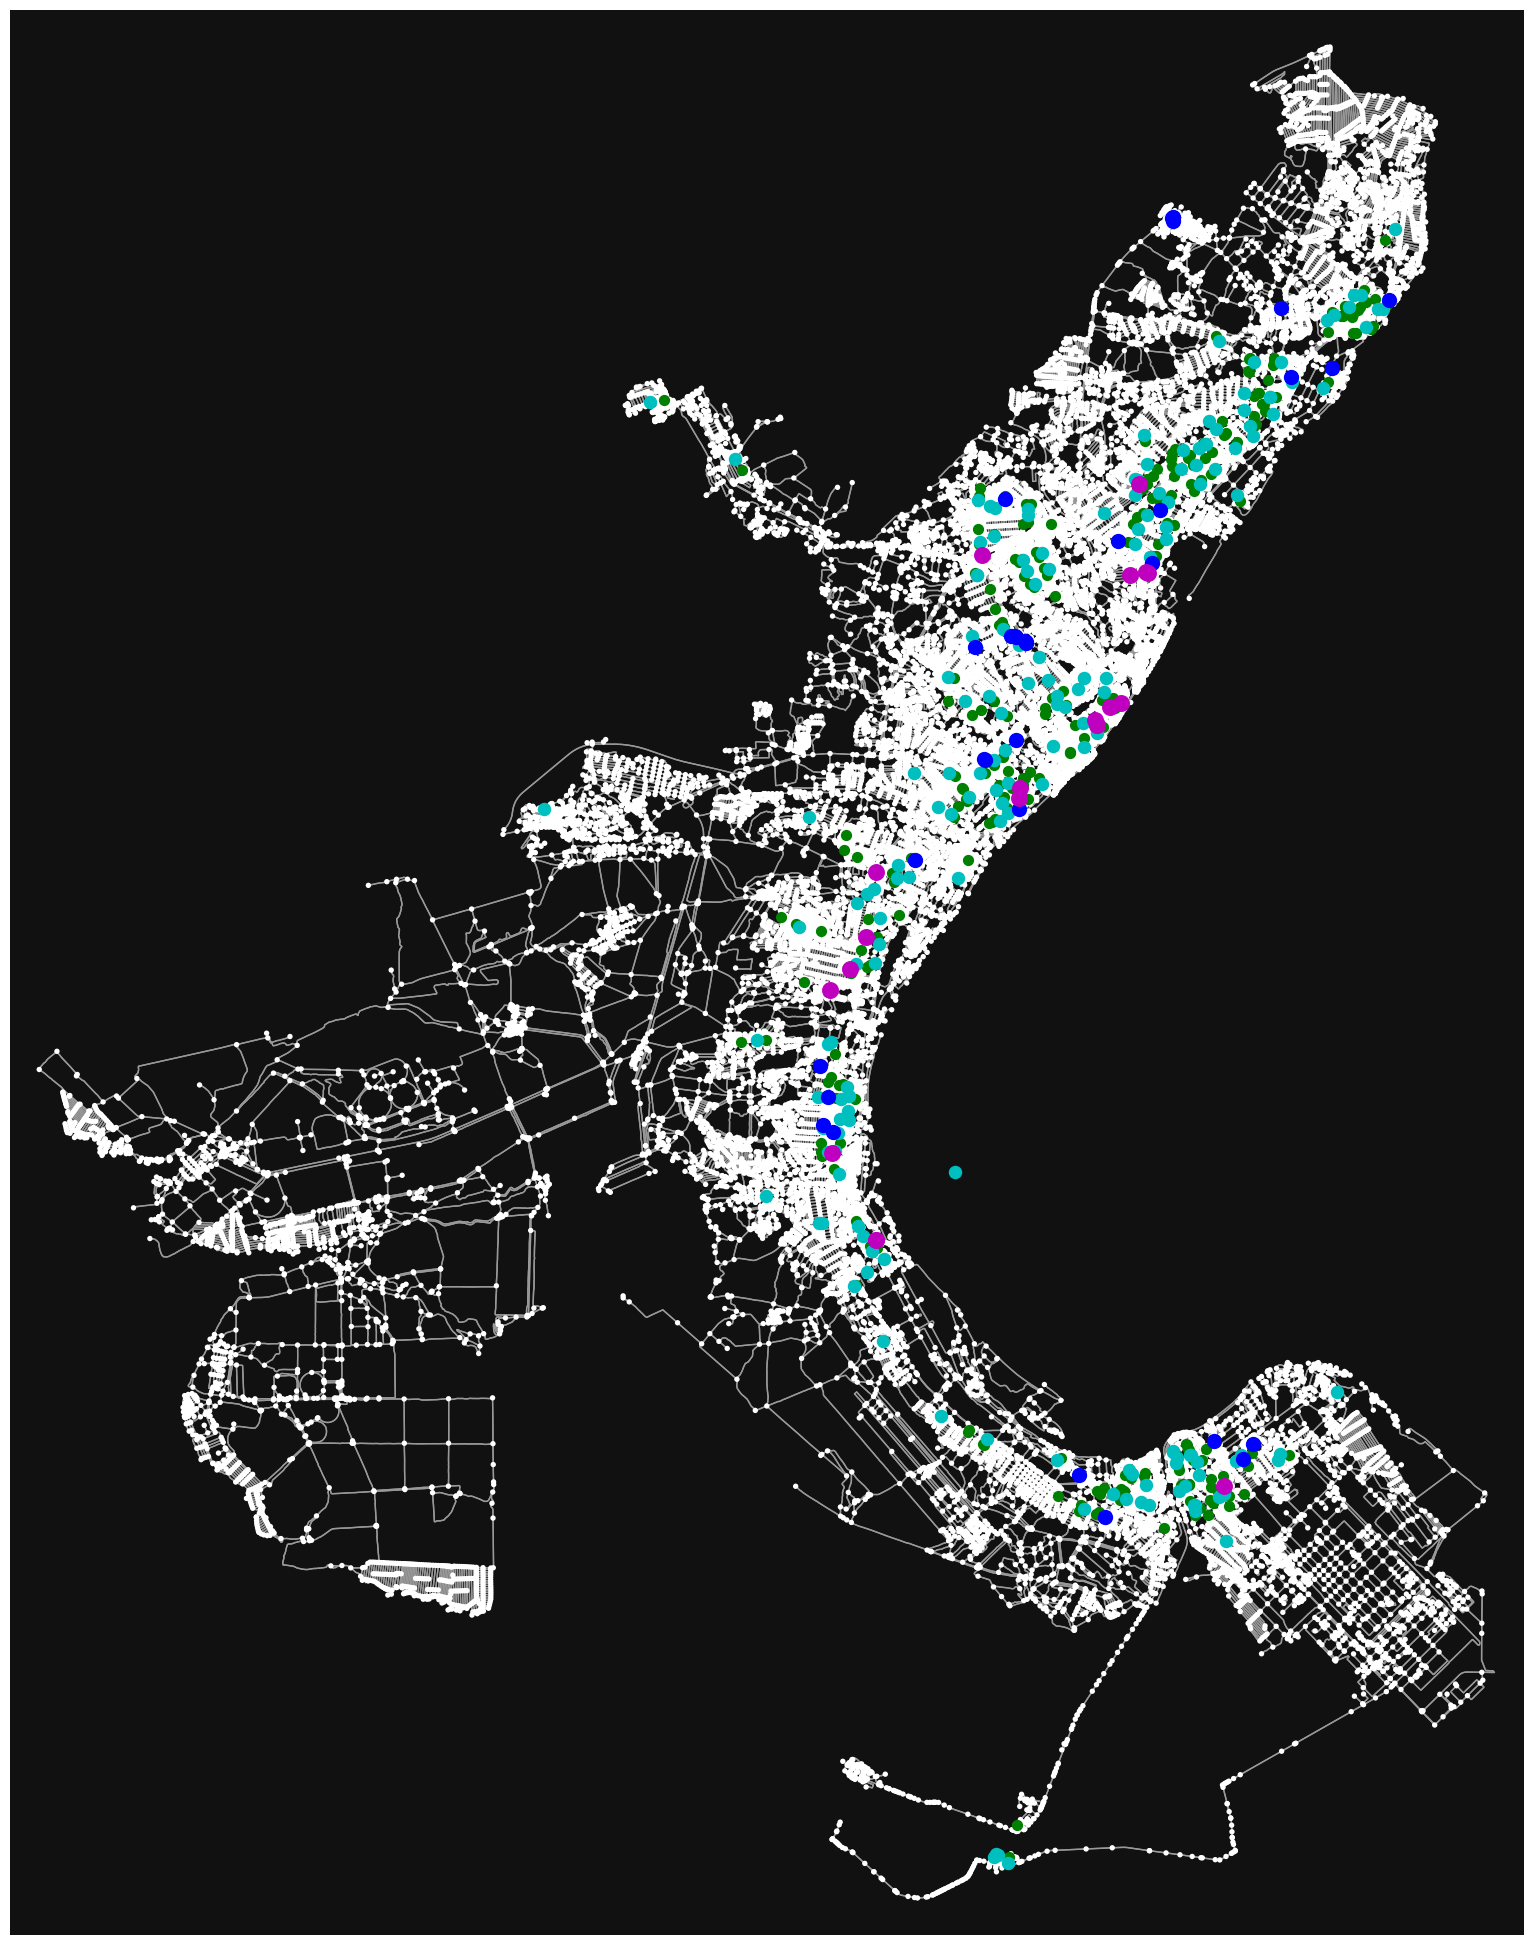

In [26]:
#вывод карты города с отмеченными на ней точками различных цветов учреждений образования
for c in range(len(cities)):
    print("\nГород:",cities[c])
    G = ox.graph_from_place(cities[c],network_type="walk")
    fig, ax = ox.plot_graph(G,figsize=(25,25), close=False, show=False)
    #вычленение широт и долгот в раздельные массивы (сначала долгота, потом широта)
    latitudes=[]
    longitudes=[]
    for q in range(len(final_mass[c][6])):
        lats=[]
        lons=[]
        for r in range(len(final_mass[c][6][q])):
            lats.append(final_mass[c][6][q][r][1])
            lons.append(final_mass[c][6][q][r][0])
        latitudes.append(lats)
        longitudes.append(lons)
        
    ax.scatter(longitudes[0],latitudes[0], c='g',s=50)#сады
    ax.scatter(longitudes[1],latitudes[1], c='c',s=75)#школы
    ax.scatter(longitudes[2],latitudes[2], c='b',s=100)#колледжи
    ax.scatter(longitudes[3],latitudes[3], c='m',s=125)#вузы
    plt.show()

        


Топ-5 школ, ближайших к: Технический университет (ВолгГТУ) [44.5282608, 48.7145228]
1 ['Автономная некоммерческая организация Православный социальный центр во имя Святой Живоначальной Троицы'] [44.527038, 48.7102817] длина пути: 0.007041818958198913
2 ['Школа №91'] [44.5298298, 48.720963] длина пути: 0.007355467094616074
3 ['МБУ СШОР №16'] [44.5216187, 48.7129827] длина пути: 0.008137717830575798
4 ['Школа № 62'] [44.5216895, 48.7066927] длина пути: 0.008525569027930694
5 ['Казачий кадетский корпус им. К.И. Недорубова'] [44.5304482, 48.7246486] длина пути: 0.010788530610796742

Топ-5 школ, ближайших к: ФГБОУ ВО ВолгГТУ "Кировский вечерний факультет" [44.421855, 48.6433659]
1 ['Юридический Лицей №6'] [44.4318744, 48.6501445] длина пути: 0.007041818958198913
2 ['Средняя школа №25'] [44.4223112, 48.6299234] длина пути: 0.007355467094616074
3 ['Средняя общеобразовательная школа № 96'] [44.4209084, 48.6295494] длина пути: 0.008137717830575798
4 ['Школа № 10'] [44.4394314, 48.6503915] длина

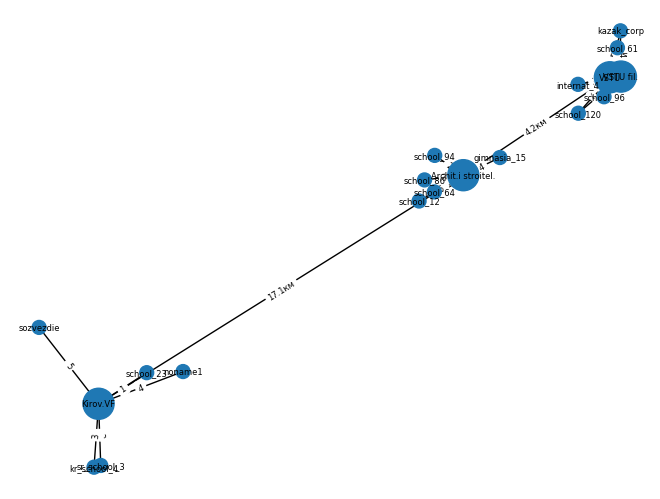

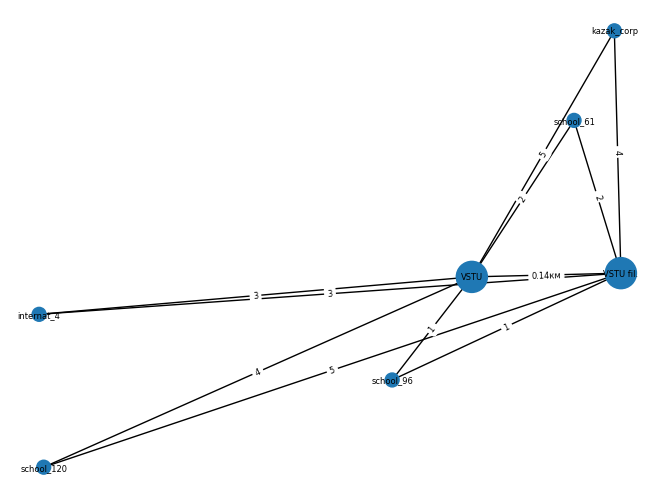

In [27]:
#среди всех школ найдем ближайшие через теорему Пифагора
vuz_names=['Технический университет (ВолгГТУ)','ФГБОУ ВО ВолгГТУ "Кировский вечерний факультет"','Волгоградский государственный технический университет (филиал)','Институт архитектуры и строительства ВолгГТУ']
vuz_coords=[[44.5282608, 48.7145228],[44.421855, 48.6433659],[44.530549, 48.714677],[44.497759, 48.693182]]
nearest_coords=[]#координаты ближайших школ
nearest_schools=[]#
for o in range(len(vuz_names)):
    delta_lat=[]#разница между широтой школы и широтой вуза
    delta_lon=[]#разница между долготой школы и долготой вуза
    route=[]#расстояния напрямую от школы до вуза (прямые пути)
    nears_coords=[]#
    nears_names=[]#
    for a in range(len(final_mass[2][6][1])):
        delta_lat.append(abs(final_mass[2][6][1][a][0]-vuz_coords[o][0]))
        delta_lon.append(abs(final_mass[2][6][1][a][1]-vuz_coords[o][1]))
        route.append((delta_lat[a]**2+delta_lon[a]**2)**0.5)#дельта широт и дельта долгот - катеты, путь - гипотенуза
    #сортировка прямых путей в порядке возрастания, чтобы наименьшие 5 записать в другой массив
    route_ind=[]#индексы 
    for d in range(len(final_mass[2][6][1])):
        route_ind.append(d)
    for b in range(len(final_mass[2][6][1])):
        for c in range(len(final_mass[2][6][1])):
            if (route[b]<route[c]):
                buf=route[b]
                route[b]=route[c]
                route[c]=buf
                buf=route_ind[b]
                route_ind[b]=route_ind[c]
                route_ind[c]=buf
    for e in range(5):
        nears=[]
        near_names=[]
        nears.append(final_mass[2][6][1][route_ind[e]][0])
        nears.append(final_mass[2][6][1][route_ind[e]][1])
        nears_coords.append(nears)
        near_names.append(final_mass[2][5][1][route_ind[e]])
        nears_names.append(near_names)
    nearest_schools.append(nears_names)
    nearest_coords.append(nears_coords)
for q in range(len(vuz_names)):
    print("\nТоп-5 школ, ближайших к:",vuz_names[q], vuz_coords[q])
    for w in range(5):
        print(w+1,nearest_schools[q][w],nearest_coords[q][w], "длина пути: "+str(route[w]))
            
    
#построение графа: для каждого технического вуза Волгограда (их 4) построить маршруты к 5 ближайшим к ним школам
G = nx.Graph()
#вузы
G.add_node('VSTU',title="VSTU", size=500)
G.add_node('Kirov.VF',title="Kirov.VF", size=500)
G.add_node('VSTU fil.',title="VSTU fil.", size=500)
G.add_node('Archit.i stroitel.',title="Archit.i stroitel.", size=500)


#школы
G.add_node('school_96', title="school_96", size=100)
G.add_node('school_61', title="school_61", size=100)
G.add_node('internat_4', title="internat_4", size=100)
G.add_node('school_120', title="school_120", size=100)
G.add_node('kazak_corp', title="kazak_corp", size=100)

G.add_node('school_23', title="school_23", size=100)
G.add_node('sr_school_3', title="sr_school_3", size=100)
G.add_node('kr_school_4', title="kr_school_4", size=100)
G.add_node('noname1', title="noname1", size=100)
G.add_node('sozvezdie', title="sozvezdie", size=100)

G.add_node('school_96', title="school_96", size=100)
G.add_node('school_61', title="school_61", size=100)
G.add_node('internat_4', title="internat_4", size=100)
G.add_node('kazak_corp', title="kazak_corp", size=100)
G.add_node('school_120', title="school_120", size=100)

G.add_node('school_64', title="school_64", size=100)
G.add_node('school_86', title="school_86", size=100)
G.add_node('school_94', title="school_94", size=100)
G.add_node('gimnasia_15', title="gimnasia_15", size=100)
G.add_node('school_12', title="school_12", size=100)


node_labelss = nx.get_node_attributes(G, 'title')  # не трогать
sizeee = nx.get_node_attributes(G, 'size')
squareee = nx.get_node_attributes(G, 'square')

G.add_edge('Kirov.VF','Archit.i stroitel.',title='17.1км')
G.add_edge('VSTU','Archit.i stroitel.',title='4.2км')
G.add_edge('VSTU','VSTU fil.',title='0.14км')
#G.add_edge('Kirov.VF','VSTU fil.',title='20.2км')
#G.add_edge('VSTU','Kirov.VF',title='20.6км')
#G.add_edge('VSTU fil.','Archit.i stroitel.',title='4км')

G.add_edge('VSTU','school_96',title='1')
G.add_edge('VSTU','school_61',title='2')
G.add_edge('VSTU','internat_4',title='3')
G.add_edge('VSTU','school_120',title='4')
G.add_edge('VSTU','kazak_corp',title='5')

G.add_edge('Kirov.VF','school_23',title='1')
G.add_edge('Kirov.VF','sr_school_3',title='2')
G.add_edge('Kirov.VF','kr_school_4',title='3')
G.add_edge('Kirov.VF','noname1',title='4')
G.add_edge('Kirov.VF','sozvezdie',title='5')

G.add_edge('VSTU fil.','school_96',title='1')
G.add_edge('VSTU fil.','school_61',title='2')
G.add_edge('VSTU fil.','internat_4',title='3')
G.add_edge('VSTU fil.','kazak_corp',title='4')
G.add_edge('VSTU fil.','school_120',title='5')

G.add_edge('Archit.i stroitel.','school_64',title='1')
G.add_edge('Archit.i stroitel.','school_94',title='2')
G.add_edge('Archit.i stroitel.','school_86',title='3')
G.add_edge('Archit.i stroitel.','gimnasia_15',title='4')
G.add_edge('Archit.i stroitel.','school_12',title='5')




edge_labels = nx.get_edge_attributes(G, 'title')

pos = {
    "VSTU":(vuz_coords[0][0], vuz_coords[0][1]),#
    "Kirov.VF":(vuz_coords[1][0], vuz_coords[1][1]),#
    "VSTU fil.":(vuz_coords[2][0], vuz_coords[2][1]),#
    "Archit.i stroitel.":(vuz_coords[3][0], vuz_coords[3][1]),#

    "school_96":(nearest_coords[0][0][0],nearest_coords[0][0][1]),
    "school_61":(nearest_coords[0][1][0],nearest_coords[0][1][1]),
    "internat_4":(nearest_coords[0][2][0],nearest_coords[0][2][1]),
    "school_120":(nearest_coords[0][3][0],nearest_coords[0][3][1]),
    "kazak_corp":(nearest_coords[0][4][0],nearest_coords[0][4][1]),

    "school_23":(nearest_coords[1][0][0],nearest_coords[1][0][1]),
    "sr_school_3":(nearest_coords[1][1][0],nearest_coords[1][1][1]),
    "kr_school_4":(nearest_coords[1][2][0],nearest_coords[1][2][1]),
    "noname1":(nearest_coords[1][3][0],nearest_coords[1][3][1]),
    "sozvezdie":(nearest_coords[1][4][0],nearest_coords[1][4][1]),

    "school_96":(nearest_coords[2][0][0],nearest_coords[2][0][1]),
    "school_61":(nearest_coords[2][1][0],nearest_coords[2][1][1]),
    "internat_4":(nearest_coords[2][2][0],nearest_coords[2][2][1]),
    "kazak_corp":(nearest_coords[2][3][0],nearest_coords[2][3][1]),
    "school_120":(nearest_coords[2][4][0],nearest_coords[2][4][1]),

    "school_64":(nearest_coords[3][0][0],nearest_coords[3][0][1]),
    "school_94":(nearest_coords[3][1][0],nearest_coords[3][1][1]),
    "school_86":(nearest_coords[3][2][0],nearest_coords[3][2][1]),
    "gimnasia_15":(nearest_coords[3][3][0],nearest_coords[3][3][1]),
    "school_12":(nearest_coords[3][4][0],nearest_coords[3][4][1]),

}

pos_labels = {
    "VSTU":(vuz_coords[0][0], vuz_coords[0][1]),#
    "Kirov.VF":(vuz_coords[1][0], vuz_coords[1][1]),#
    "VSTU fil.":(vuz_coords[2][0], vuz_coords[2][1]),#
    "Archit.i stroitel.":(vuz_coords[3][0], vuz_coords[3][1]),#

    "school_96":(nearest_coords[0][0][0],nearest_coords[0][0][1]),
    "school_61":(nearest_coords[0][1][0],nearest_coords[0][1][1]),
    "internat_4":(nearest_coords[0][2][0],nearest_coords[0][2][1]),
    "school_120":(nearest_coords[0][3][0],nearest_coords[0][3][1]),
    "kazak_corp":(nearest_coords[0][4][0],nearest_coords[0][4][1]),

    "school_23":(nearest_coords[1][0][0],nearest_coords[1][0][1]),
    "sr_school_3":(nearest_coords[1][1][0],nearest_coords[1][1][1]),
    "kr_school_4":(nearest_coords[1][2][0],nearest_coords[1][2][1]),
    "noname1":(nearest_coords[1][3][0],nearest_coords[1][3][1]),
    "sozvezdie":(nearest_coords[1][4][0],nearest_coords[1][4][1]),

    "school_96":(nearest_coords[2][0][0],nearest_coords[2][0][1]),
    "school_61":(nearest_coords[2][1][0],nearest_coords[2][1][1]),
    "internat_4":(nearest_coords[2][2][0],nearest_coords[2][2][1]),
    "kazak_corp":(nearest_coords[2][3][0],nearest_coords[2][3][1]),
    "school_120":(nearest_coords[2][4][0],nearest_coords[2][4][1]),

    "school_64":(nearest_coords[3][0][0],nearest_coords[3][0][1]),
    "school_94":(nearest_coords[3][1][0],nearest_coords[3][1][1]),
    "school_86":(nearest_coords[3][2][0],nearest_coords[3][2][1]),
    "gimnasia_15":(nearest_coords[3][3][0],nearest_coords[3][3][1]),
    "school_12":(nearest_coords[3][4][0],nearest_coords[3][4][1]),

}

pos_area = {

    "VSTU":(vuz_coords[0][0], vuz_coords[0][1]),#
    "Kirov.VF":(vuz_coords[1][0], vuz_coords[1][1]),#
    "VSTU fil.":(vuz_coords[2][0], vuz_coords[2][1]),#
    "Archit.i stroitel.":(vuz_coords[3][0], vuz_coords[3][1]),#
    
    "school_96":(nearest_coords[0][0][0],nearest_coords[0][0][1]),
    "school_61":(nearest_coords[0][1][0],nearest_coords[0][1][1]),
    "internat_4":(nearest_coords[0][2][0],nearest_coords[0][2][1]),
    "school_120":(nearest_coords[0][3][0],nearest_coords[0][3][1]),
    "kazak_corp":(nearest_coords[0][4][0],nearest_coords[0][4][1]),

    "school_23":(nearest_coords[1][0][0],nearest_coords[1][0][1]),
    "sr_school_3":(nearest_coords[1][1][0],nearest_coords[1][1][1]),
    "kr_school_4":(nearest_coords[1][2][0],nearest_coords[1][2][1]),
    "noname1":(nearest_coords[1][3][0],nearest_coords[1][3][1]),
    "sozvezdie":(nearest_coords[1][4][0],nearest_coords[1][4][1]),

    "school_96":(nearest_coords[2][0][0],nearest_coords[2][0][1]),
    "school_61":(nearest_coords[2][1][0],nearest_coords[2][1][1]),
    "internat_4":(nearest_coords[2][2][0],nearest_coords[2][2][1]),
    "kazak_corp":(nearest_coords[2][3][0],nearest_coords[2][3][1]),
    "school_120":(nearest_coords[2][4][0],nearest_coords[2][4][1]),

    "school_64":(nearest_coords[3][0][0],nearest_coords[3][0][1]),
    "school_94":(nearest_coords[3][1][0],nearest_coords[3][1][1]),
    "school_86":(nearest_coords[3][2][0],nearest_coords[3][2][1]),
    "gimnasia_15":(nearest_coords[3][3][0],nearest_coords[3][3][1]),
    "school_12":(nearest_coords[3][4][0],nearest_coords[3][4][1]),


}

nx.draw(G, pos=pos, node_size=[v for v in sizeee.values()])   # заготовка, отрисовка без надписей
#nx.draw(G, pos=pos, node_size=50)
nx.draw_networkx_labels(G, pos=pos_labels, labels=node_labelss, font_size=6,font_weight='light')   # за название отвечает
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=6)     # вес между точками (вес дуг)

plt.margins(0.)
plt.show()



#более крупный граф, отобрадающий ближайшие школы к ВолгГТУ и филиалу ВолгГТУ
G = nx.Graph()
#вузы
G.add_node('VSTU',title="VSTU", size=500)
#G.add_node('Kirov.VF',title="Kirov.VF", size=500)
G.add_node('VSTU fil.',title="VSTU fil.", size=500)
#G.add_node('Archit.i stroitel.',title="Archit.i stroitel.", size=500)


#школы
G.add_node('school_96', title="school_96", size=100)
G.add_node('school_61', title="school_61", size=100)
G.add_node('internat_4', title="internat_4", size=100)
G.add_node('school_120', title="school_120", size=100)
G.add_node('kazak_corp', title="kazak_corp", size=100)


node_labelss = nx.get_node_attributes(G, 'title')  # не трогать
sizeee = nx.get_node_attributes(G, 'size')
squareee = nx.get_node_attributes(G, 'square')

#G.add_edge('Kirov.VF','Archit.i stroitel.',title='17.1км')
#G.add_edge('VSTU','Archit.i stroitel.',title='4.2км')
G.add_edge('VSTU','VSTU fil.',title='0.14км')
#G.add_edge('Kirov.VF','VSTU fil.',title='20.2км')
#G.add_edge('VSTU','Kirov.VF',title='20.6км')
#G.add_edge('VSTU fil.','Archit.i stroitel.',title='4км')

G.add_edge('VSTU','school_96',title='1')
G.add_edge('VSTU','school_61',title='2')
G.add_edge('VSTU','internat_4',title='3')
G.add_edge('VSTU','school_120',title='4')
G.add_edge('VSTU','kazak_corp',title='5')

G.add_edge('VSTU fil.','school_96',title='1')
G.add_edge('VSTU fil.','school_61',title='2')
G.add_edge('VSTU fil.','internat_4',title='3')
G.add_edge('VSTU fil.','kazak_corp',title='4')
G.add_edge('VSTU fil.','school_120',title='5')


edge_labels = nx.get_edge_attributes(G, 'title')

pos = {
    "VSTU":(vuz_coords[0][0], vuz_coords[0][1]),#
    #"Kirov.VF":(vuz_coords[1][0], vuz_coords[1][1]),#
    "VSTU fil.":(vuz_coords[2][0], vuz_coords[2][1]),#
    #"Archit.i stroitel.":(vuz_coords[3][0], vuz_coords[3][1]),#

    "school_96":(nearest_coords[0][0][0],nearest_coords[0][0][1]),
    "school_61":(nearest_coords[0][1][0],nearest_coords[0][1][1]),
    "internat_4":(nearest_coords[0][2][0],nearest_coords[0][2][1]),
    "school_120":(nearest_coords[0][3][0],nearest_coords[0][3][1]),
    "kazak_corp":(nearest_coords[0][4][0],nearest_coords[0][4][1]),

}

pos_labels = {
    "VSTU":(vuz_coords[0][0], vuz_coords[0][1]),#
    #"Kirov.VF":(vuz_coords[1][0], vuz_coords[1][1]),#
    "VSTU fil.":(vuz_coords[2][0], vuz_coords[2][1]),#
    #"Archit.i stroitel.":(vuz_coords[3][0], vuz_coords[3][1]),#

    "school_96":(nearest_coords[0][0][0],nearest_coords[0][0][1]),
    "school_61":(nearest_coords[0][1][0],nearest_coords[0][1][1]),
    "internat_4":(nearest_coords[0][2][0],nearest_coords[0][2][1]),
    "school_120":(nearest_coords[0][3][0],nearest_coords[0][3][1]),
    "kazak_corp":(nearest_coords[0][4][0],nearest_coords[0][4][1]),

}

pos_area = {

    "VSTU":(vuz_coords[0][0], vuz_coords[0][1]),#
    #"Kirov.VF":(vuz_coords[1][0], vuz_coords[1][1]),#
    "VSTU fil.":(vuz_coords[2][0], vuz_coords[2][1]),#
    #"Archit.i stroitel.":(vuz_coords[3][0], vuz_coords[3][1]),#

    "school_96":(nearest_coords[0][0][0],nearest_coords[0][0][1]),
    "school_61":(nearest_coords[0][1][0],nearest_coords[0][1][1]),
    "internat_4":(nearest_coords[0][2][0],nearest_coords[0][2][1]),
    "school_120":(nearest_coords[0][3][0],nearest_coords[0][3][1]),
    "kazak_corp":(nearest_coords[0][4][0],nearest_coords[0][4][1]),

}

nx.draw(G, pos=pos, node_size=[v for v in sizeee.values()])   # заготовка, отрисовка без надписей
nx.draw_networkx_labels(G, pos=pos_labels, labels=node_labelss, font_size=6,font_weight='light')   # за название отвечает
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=6)     # вес между точками (вес дуг)

plt.margins(0.)
plt.show()


#через пути osmnx не вышло(((
#для каждого технического вуза города найти 5 ближайших школ
techmass=[]
#print(len(final_mass[2][6][3]))
for i in range(len(final_mass[2][6][3])):
    #print(i+1,final_mass[2][5][3][i],final_mass[2][6][3][i])
    if ((("ВолгГТУ" in final_mass[2][5][3][i])or("технический" in final_mass[2][5][3][i])or("Технический" in final_mass[2][5][3][i]))and ("архитектуры" not in final_mass[2][5][3][i])):
        #techcount+=1
        #techmass.append(i)
        techmass0=[]
        #techmass.append(final_mass[2][5][3][i])
        techmass0.append(final_mass[2][5][3][i])#название
        techmass0.append(final_mass[2][6][3][i])#координаты шир долг
        techmass.append(techmass0)


G = ox.graph_from_place(cities[2],network_type="walk")
fig, ax = ox.plot_graph(G,figsize=(25,25), close=False, show=False)
G = ox.add_edge_speeds(G)#добавим скорость на граф
G = ox.add_edge_travel_times(G)#время
#вычленение всех широт и долгот волгоградских школ в отдельные массивы
s_lat=[]
s_lon=[]
for j in range(len(final_mass[2][6][1])):#кол-во влг школ
    s_lat.append(final_mass[2][6][1][j][0])
    s_lon.append(final_mass[2][6][1][j][1])
    
five_nearest_schools=[]    
for i in range(len(techmass)):#кол-во технич.волгоградских вузов
    vuz_point = techmass[i][1][0], techmass[i][1][1]#широта, долгота
    #найдем вершину графа, ближайшую к вузу
    nearest_edge_vuz = ox.nearest_edges(G,vuz_point[1],vuz_point[0])
    #найдем вершины, ближайшие к школам
    nearest_schools = ox.nearest_edges(G,s_lon,s_lat)
    #print("\nвсего вершин",len(list(G)))
    #нарисуем один путь
    #route = nx.shortest_path()
    #print(i, nearest_edge_vuz,nearest_schools)
    #измерим пути по всем объектам
    route_lengths=[]
    for j in range(len(s_lat)):#кол-во влг школ
        route = nx.shortest_path(G,nearest_edge_vuz[0],nearest_schools[j][0])
        route_len = int(sum(ox.utils_graph.get_route_edge_attributes(G,route,'length')))
        route_lengths.append(route_len)
    #сортируем, чтобы выбрать 5 ближайших путей
    indexmass=[]#массив индексов школ
    for s in range(len(s_lon)):
        indexmass.append(s)
    #производим сортировку путей
    for a in range(len(s_lon)):
        for b in range(len(s_lon)):
            if (route_lengths[a]>route_lengths[b]):
                buf = route_lengths[a]
                route_lengths[a]=route_lengths[b]
                route_lengths[b]=buf
                buf=indexmass[a]
                indexmass[a]=indexmass[b]
                indexmass[b]=buf
    print(route_lengths)
#print(len(s_lon))
#print(s_lon)
    
